In [1]:
import pandas as pd
import os

# Create a reports directory if it doesn't exist
output_dir = "Mobile_Sales_Report"
os.makedirs(output_dir, exist_ok=True)
pd.read_excel('C:/Users/hp/Desktop/Onyx Data - DataDNA Dataset Challenge - Mobile Phone Sales Dataset - May 2025.xlsx')

,Transaction_ID,Transaction_Date,End of Month,Mobile_Model,Brand,Storage_Size,Color,Operating_System,Price,Units_Sold,Total_Revenue,Sales_Channel,Payment_Type,Customer_Age,Customer_Age_Group,Customer_Gender,Country,City,Latitude,Longitude
0,3a59ca6b-4f80-443f-9925-c6471b119fc5,2024-01-01,2024-01-31,Pixel 8a,Google,128GB,Blue,Android,534,20,10680,Online,UPI,40,34-41,Male,Pakistan,Lahore,31.5497,74.3436
1,45cf6d15-4c86-4367-ada7-cdb67dc97ae2,2024-01-02,2024-01-31,Pixel 8a,Google,256GB,White,Android,531,65,34515,Partner,Cash,55,50-57,Other,Pakistan,Multan,30.1575,71.5249
2,4053c488-2914-4b4b-add0-8b8ae200f475,2024-01-03,2024-01-31,OnePlus 11R,OnePlus,256GB,Green,Android,608,58,35264,Online,EMI,40,34-41,Female,Bangladesh,Chittagong,22.3569,91.7832
3,fdd350a0-77de-454d-af2d-d1533913542a,2024-01-04,2024-01-31,Redmi Note 13,Xiaomi,256GB,Green,Android,342,25,8550,Online,Credit Card,32,26-33,Female,Turkey,Bursa,40.1828,29.0665
4,5162e904-aa16-4967-9471-d242b21d3246,2024-01-05,2024-01-31,Z Fold 6,Samsung,128GB,Black,Android,1841,57,104937,Online,UPI,47,42-49,Female,Bangladesh,Rajshahi,24.3745,88.6042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,999884f1-17c1-4366-a5e3-8c63f28673dc,2024-12-27,2024-12-31,OnePlus 12 Pro,OnePlus,256GB,Blue,Android,829,21,17409,Online,EMI,19,18-25,Female,India,Lucknow,26.8467,80.9462
362,34a118c4-60d2-4450-8bc1-0c8435adabeb,2024-12-28,2024-12-31,Pixel 8a,Google,64GB,Blue,Android,539,18,9702,Online,EMI,44,42-49,Female,Turkey,Izmir,38.4192,27.1287
363,f26a4e4f-7e9e-481e-a594-fede2d967ec5,2024-12-29,2024-12-31,iPhone 14,Apple,64GB,Blue,iOS,884,29,25636,Retail Store,Cash,37,34-41,Female,India,Ahmedabad,23.0225,72.5714
364,aa4eddb8-b9a3-4f56-89f3-964b0d417867,2024-12-30,2024-12-31,iPhone 15,Apple,256GB,Black,iOS,877,88,77176,Retail Store,EMI,61,58-65,Male,Turkey,Bursa,40.1828,29.0665


In [2]:
phones = pd.read_excel('C:/Users/hp/Desktop/Onyx Data - DataDNA Dataset Challenge - Mobile Phone Sales Dataset - May 2025.xlsx')

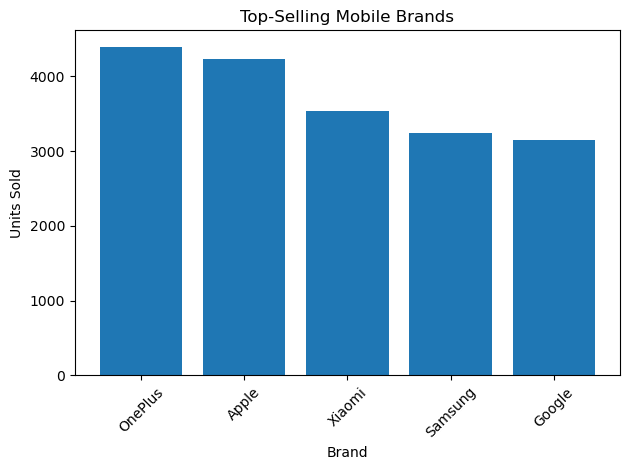

In [3]:
import matplotlib.pyplot as plt
# Group by brand and sum the units sold
brand_sales = phones.groupby('Brand')['Units_Sold'].sum().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots()
ax.bar(brand_sales.index, brand_sales.values)
ax.set_xlabel('Brand')
ax.set_ylabel('Units Sold')
ax.set_title('Top-Selling Mobile Brands')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(output_dir, "Top-Selling_Mobile_Brands.jpg"), dpi=300)
plt.close(fig)

In [4]:
import plotly.express as px

# Group by country and sum units sold
country_sales = phones.groupby('Country')['Units_Sold'].sum().reset_index()

# Create the map chart
fig = px.choropleth(country_sales,
                    locations='Country',
                    locationmode='country names',
                    color='Units_Sold',
                    title='Sales Volume by Region',
                    projection='natural earth',
                    color_continuous_scale='Blues')

fig.show()

fig.write_image(os.path.join(output_dir, "Sales_Volume_by_Region.jpg"), scale=2)

In [5]:
import plotly.express as px

# Group by Latitude and Longitude and sum units sold
location_sales = phones.groupby(['Country', 'Latitude', 'Longitude'])['Units_Sold'].sum().reset_index()

# Create a scatter geo plot
fig = px.scatter_geo(location_sales,
                     lat='Latitude',
                     lon='Longitude',
                     size='Units_Sold',
                     hover_name='Country',
                     title='Sales Volume by Region',
                     projection='natural earth',
                     color='Units_Sold',
                     color_continuous_scale='Blues')

fig.show()

fig.write_image(os.path.join(output_dir, "Sales_Volume_by_Lat_&_Long.jpg"), scale=2)

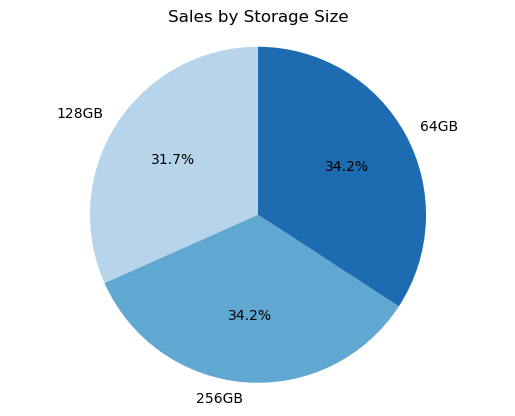

In [6]:
import matplotlib.pyplot as plt

# Group by Storage_Size and sum Units_Sold
storage_sales = phones.groupby('Storage_Size')['Units_Sold'].sum()

# Generate different shades of blue using the Blues colormap
colors = plt.cm.Blues([0.3 + 0.7 * (i / len(storage_sales)) for i in range(len(storage_sales))])

# Create pie chart with blue shades
fig, ax = plt.subplots()
ax.pie(storage_sales.values, labels=storage_sales.index, autopct='%1.1f%%',
       startangle=90, colors=colors)
ax.set_title('Sales by Storage Size')
ax.axis('equal')  # Equal aspect ratio ensures the pie is a circle

plt.show()

fig.savefig(os.path.join(output_dir, "Sales_by_Storage_Size.jpg"), dpi=300)
plt.close(fig)

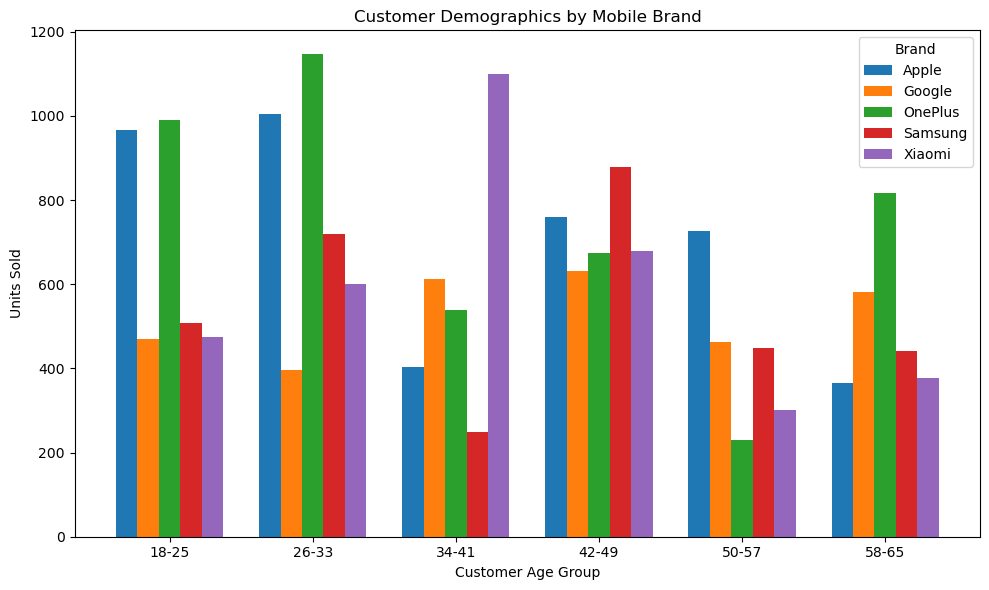

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group the data by Age Group and Brand, and sum Units Sold
grouped_data = phones.groupby(['Customer_Age_Group', 'Brand'])['Units_Sold'].sum().unstack().fillna(0)

# Set up the bar positions
age_groups = grouped_data.index
brands = grouped_data.columns
x = np.arange(len(age_groups))  # positions on the x-axis
bar_width = 0.15

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each brand as a separate bar group
for i, brand in enumerate(brands):
    ax.bar(x + i * bar_width, grouped_data[brand], width=bar_width, label=brand)

# Set labels and title
ax.set_xlabel('Customer Age Group')
ax.set_ylabel('Units Sold')
ax.set_title('Customer Demographics by Mobile Brand')
ax.set_xticks(x + bar_width * (len(brands) - 1) / 2)
ax.set_xticklabels(age_groups)
ax.legend(title='Brand')

plt.tight_layout()
plt.show()

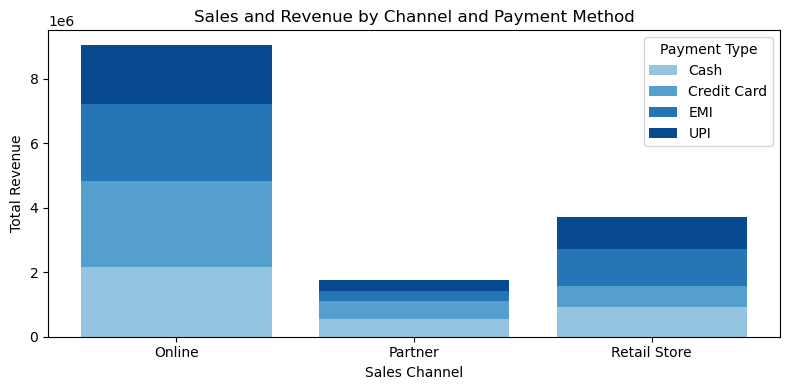

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group by Sales_Channel and Payment_Type, then sum Total_Revenue
grouped_data = phones.groupby(['Sales_Channel', 'Payment_Type'])['Total_Revenue'].sum().unstack().fillna(0)

# Set up plot
sales_channels = grouped_data.index
payment_types = grouped_data.columns
x = np.arange(len(sales_channels))  # positions on x-axis

# Colors (optional: use blues or custom palette)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(payment_types)))

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))

bottom = np.zeros(len(sales_channels))  # track where each stack starts
for i, (payment_type, color) in enumerate(zip(payment_types, colors)):
    ax.bar(x, grouped_data[payment_type], bottom=bottom, label=payment_type, color=color)
    bottom += grouped_data[payment_type]

# Axis labels and title
ax.set_xlabel('Sales Channel')
ax.set_ylabel('Total Revenue')
ax.set_title('Sales and Revenue by Channel and Payment Method')
ax.set_xticks(x)
ax.set_xticklabels(sales_channels)
ax.legend(title='Payment Type')

plt.tight_layout()
plt.show()

fig.savefig(os.path.join(output_dir, "Payment_Type.jpg"), dpi=300)
plt.close(fig)

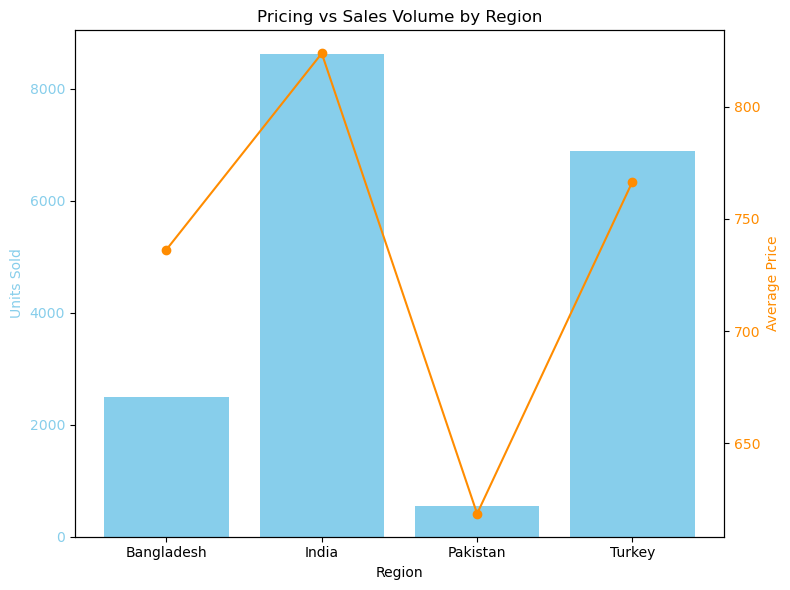

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample aggregation
# Grouping by region (Country in this case; adjust if 'Region' is a separate column)
region_group = phones.groupby('Country').agg({
    'Units_Sold': 'sum',
    'Price': 'mean'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Units Sold (volume) on primary y-axis
ax1.bar(region_group['Country'], region_group['Units_Sold'], color='skyblue', label='Units Sold')
ax1.set_xlabel('Region')
ax1.set_ylabel('Units Sold', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create secondary y-axis for average price
ax2 = ax1.twinx()
ax2.plot(region_group['Country'], region_group['Price'], color='darkorange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Title and layout
plt.title('Pricing vs Sales Volume by Region')
fig.tight_layout()
plt.show()

fig.savefig(os.path.join(output_dir, "Pricing_vs_Sales_Volume_by_Region.jpg"), dpi=300)
plt.close(fig)

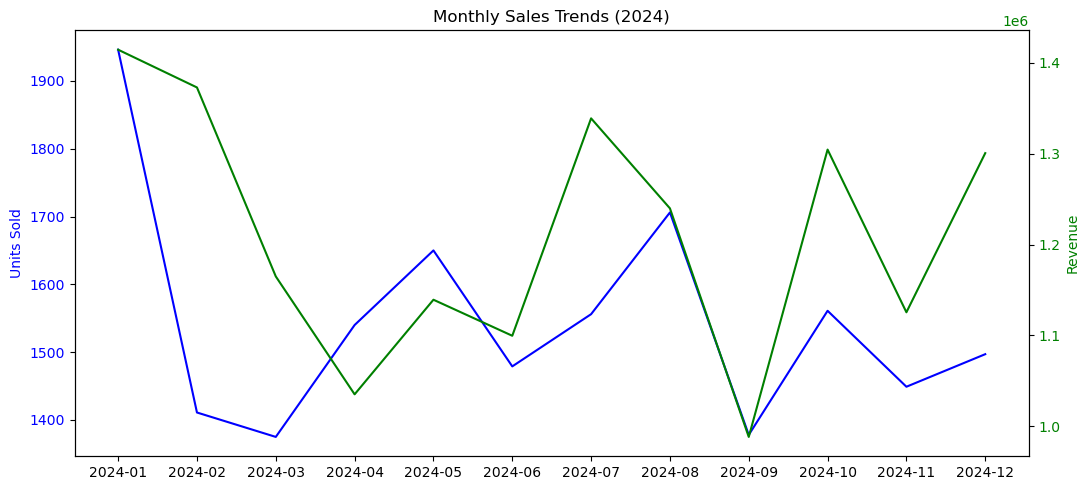

In [10]:
phones['Transaction_Date'] = pd.to_datetime(phones['Transaction_Date'])
phones['Sale_Month'] = phones['Transaction_Date'].dt.to_period('M').astype(str)

monthly = phones.groupby('Sale_Month')[['Units_Sold', 'Total_Revenue']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(11, 5))
ax1.plot(monthly['Sale_Month'], monthly['Units_Sold'], color='blue')
ax1.set_ylabel('Units Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(monthly['Sale_Month'], monthly['Total_Revenue'], color='green')
ax2.set_ylabel('Revenue', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Sales Trends (2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(output_dir, "Monthly_Sales_Trends.jpg"), dpi=300)
plt.close(fig)

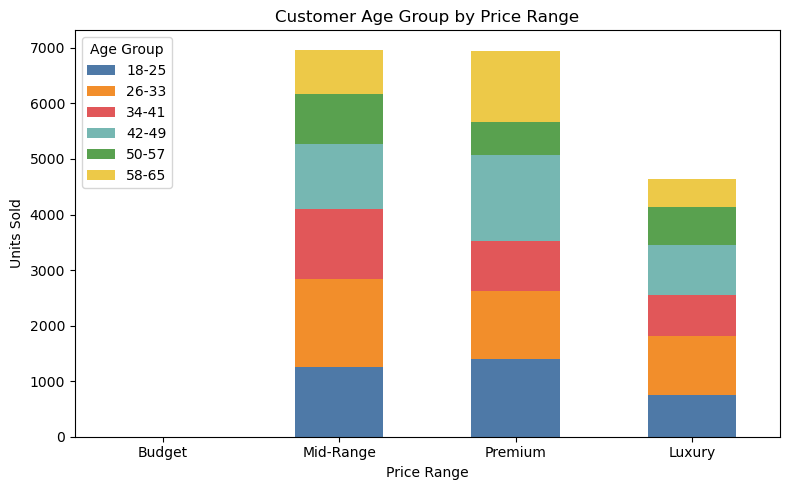

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Create price range bins
phones['Price_Range'] = pd.cut(
    phones['Price'],
    bins=[0, 300, 600, 1000, 2000],
    labels=['Budget', 'Mid-Range', 'Premium', 'Luxury']
)

# Create pivot table for plotting
pivot = phones.groupby(['Price_Range', 'Customer_Age_Group'])['Units_Sold'].sum().unstack(fill_value=0)

# Define a neater color palette
custom_colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948']

# Plot with clean color scheme
fig, ax = plt.subplots(figsize=(8, 5))
pivot.plot(kind='bar', stacked=True, ax=ax, color=custom_colors[:len(pivot.columns)])

ax.set_title('Customer Age Group by Price Range')
ax.set_ylabel('Units Sold')
ax.set_xlabel('Price Range')
ax.legend(title='Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(output_dir, "Customer_Age_Group_by_Price_Range.jpg"), dpi=300)
plt.close(fig)

In [12]:
import plotly.express as px
import pandas as pd

# Aggregate city-level data
city_data = phones.groupby(['City', 'Latitude', 'Longitude'], as_index=False).agg({
    'Total_Revenue': 'sum',
    'Units_Sold': 'sum'
})

# Plotly interactive scatter geo plot (zoomed to a continent)
fig = px.scatter_geo(
    city_data,
    lat='Latitude',
    lon='Longitude',
    text='City',
    hover_name='City',
    hover_data={'Total_Revenue': True, 'Units_Sold': True},
    size='Total_Revenue',
    size_max=25,
    color='Total_Revenue',
    color_continuous_scale='Viridis',  # Reverted to Viridis
    projection='natural earth',
    title='Revenue & Units Sold by City (Continent View)'
)

# Zoom into your target continent — e.g., 'asia', 'europe', etc.
fig.update_geos(scope='asia', showland=True, landcolor='lightgray')

fig.update_layout(margin={"r":0, "t":50, "l":0, "b":0})
fig.show()
fig.write_image(os.path.join(output_dir, "Revenue_&_Units_Sold_by_City.jpg"), scale=2)